<a href="https://colab.research.google.com/github/Yamito548/Proyecto-Denge/blob/main/proyecto_denge_SNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO SNS: DengAI

En este trabajo vamos a participar en el [proyecto](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/). En donde deberemos que trabajar con los datos que hay subidos a la web. **3.8 **para importar dataframe.

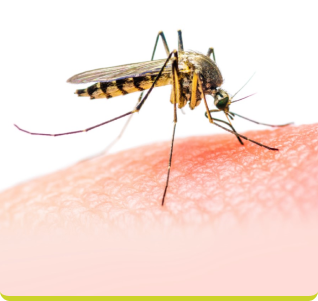

[Enlace de la imagen](https://www.ecopetrol.com.co/wps/wcm/connect/3e0e3797-f059-45a9-8db2-164745ff46d2/1/image+9+%281%29.png?MOD=AJPERES)

# Importar datos desde el github

Librerías

In [185]:
import numpy as np
import pandas as pd
from google.colab import files

In [186]:
#Cargamos todos los datos desde mi github
github_personal = "https://github.com/Yamito548/Proyecto-Denge"
primero = "https://raw.githubusercontent.com/Yamito548/Proyecto-Denge/main/dengue_features_test.csv"
segundo = "https://raw.githubusercontent.com/Yamito548/Proyecto-Denge/main/dengue_features_train.csv"
tercero = "https://raw.githubusercontent.com/Yamito548/Proyecto-Denge/main/dengue_labels_train.csv"
data_test = pd.read_csv(primero)
data_train = pd.read_csv(segundo)
etiqueta_total_cases = pd.read_csv(tercero)

#Concatenamos ambos dataset.
data = pd.concat([data_test,data_train])
df_total_cases = etiqueta_total_cases["total_cases"]
#Añadimos la y, que viene a ser total_cases
data['total_cases'] = df_total_cases
data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,4
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


Podemos ver que los dataset se han fusionado llegando a tener 1872 y 24 columnas en total filas.

# Adaptamos los datos

Quitamos la variable *week_start_date* debido a que no creo que sea muy importante para este trabajo.

In [187]:
data.drop("week_start_date", axis = 1, inplace = True)

In [188]:
#Revisamos si hay missing values.
missing_values = data.isnull().sum()
print(missing_values)

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_min_temp_c                        23
station_pr

Ahora veremos si hay missing values, los cuales si hubiera nos darían problemas a la hora de manipular y dividir los datos. En este dataset pues sí, digamos que hay bastantes missing values. En un primer inicio pensé en simplemente borrar todas las filas en las que hubiera datos faltantes pero luego reflexione que podría cargarme gran parte del dataset ya que se podría dar el caso de que en muchas filas hubieran todos los missing values que podemos ver ahí es decir que esa fila apenas tendría datos pero esto solo sería una posibilidad ya que puede ser el caso de que hubiera un missing value en cada fila en el sentido de que no estuvieran varias en la misma fila, es por ello que consideré mejor hacer lo siguiente.

In [189]:
#Revisamos de que no hayan datos faltantes
# Imputar los valores faltantes en las columnas numéricas con la media
data.fillna(data.mean(), inplace=True)

# Imputar los valores faltantes en las columnas categóricas con la moda
data.fillna(data.mode().iloc[0], inplace=True)
missing_values = data.isnull().sum()
print(missing_values)

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

<ipython-input-189-a1e0b214964c>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [190]:
#Convertimos las columna city a int
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ciudades = data['city']
data['city'] = encoder.fit_transform(ciudades)

Escalamos los datos para que el proceso de estos sea mucho mejor.

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columnas_no_escalar = ['year','weekofyear','total_cases']
columnas_a_escalar = [col for col in data.columns if col not in columnas_no_escalar]
data[columnas_a_escalar] = scaler.fit_transform(data[columnas_a_escalar])
data

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1.0,2008,18,0.457419,0.395620,0.213528,0.253755,0.201229,0.515135,0.433531,...,0.514278,0.201229,0.480562,0.120740,0.545593,0.256379,0.425806,0.600,0.138413,4
1,1.0,2008,19,0.458345,0.401502,0.176179,0.222768,0.032156,0.512892,0.434378,...,0.500770,0.032156,0.466024,0.082765,0.496960,0.128797,0.212903,0.640,0.063133,5
2,1.0,2008,20,0.475325,0.530100,0.300835,0.254294,0.009370,0.641069,0.529213,...,0.501750,0.009370,0.566972,0.209348,0.694529,0.318348,0.393548,0.688,0.005522,4
3,1.0,2008,21,0.619484,0.394746,0.252528,0.310338,0.000000,0.671712,0.573243,...,0.373040,0.000000,0.464227,0.203505,0.708207,0.189550,0.425806,0.816,0.000552,3
4,1.0,2008,22,0.535319,0.448768,0.140472,0.228675,0.001946,0.683483,0.566469,...,0.399216,0.001946,0.505554,0.148978,0.661094,0.258809,0.425806,0.728,0.154795,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,0.829580,0.701294,0.490886,0.584064,0.141577,0.625187,0.696867,...,0.758854,0.141577,0.774093,0.575463,0.769504,0.671122,0.561290,0.656,0.049696,5
1452,0.0,2010,22,0.641680,0.557842,0.273679,0.474367,0.221377,0.493834,0.533446,...,0.828282,0.221377,0.726560,0.416748,0.641844,0.549210,0.516129,0.600,0.067366,8
1453,0.0,2010,23,0.731106,0.544889,0.480079,0.487587,0.150896,0.267377,0.320068,...,0.893932,0.150896,0.605194,0.418695,0.319149,0.243013,0.354839,0.400,0.013620,1
1454,0.0,2010,24,0.820487,0.635120,0.531588,0.638162,0.152765,0.234305,0.311600,...,0.903240,0.152765,0.583143,0.444012,0.429078,0.398947,0.290323,0.544,0.029450,1


In [192]:
data

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1.0,2008,18,0.457419,0.395620,0.213528,0.253755,0.201229,0.515135,0.433531,...,0.514278,0.201229,0.480562,0.120740,0.545593,0.256379,0.425806,0.600,0.138413,4
1,1.0,2008,19,0.458345,0.401502,0.176179,0.222768,0.032156,0.512892,0.434378,...,0.500770,0.032156,0.466024,0.082765,0.496960,0.128797,0.212903,0.640,0.063133,5
2,1.0,2008,20,0.475325,0.530100,0.300835,0.254294,0.009370,0.641069,0.529213,...,0.501750,0.009370,0.566972,0.209348,0.694529,0.318348,0.393548,0.688,0.005522,4
3,1.0,2008,21,0.619484,0.394746,0.252528,0.310338,0.000000,0.671712,0.573243,...,0.373040,0.000000,0.464227,0.203505,0.708207,0.189550,0.425806,0.816,0.000552,3
4,1.0,2008,22,0.535319,0.448768,0.140472,0.228675,0.001946,0.683483,0.566469,...,0.399216,0.001946,0.505554,0.148978,0.661094,0.258809,0.425806,0.728,0.154795,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,0.829580,0.701294,0.490886,0.584064,0.141577,0.625187,0.696867,...,0.758854,0.141577,0.774093,0.575463,0.769504,0.671122,0.561290,0.656,0.049696,5
1452,0.0,2010,22,0.641680,0.557842,0.273679,0.474367,0.221377,0.493834,0.533446,...,0.828282,0.221377,0.726560,0.416748,0.641844,0.549210,0.516129,0.600,0.067366,8
1453,0.0,2010,23,0.731106,0.544889,0.480079,0.487587,0.150896,0.267377,0.320068,...,0.893932,0.150896,0.605194,0.418695,0.319149,0.243013,0.354839,0.400,0.013620,1
1454,0.0,2010,24,0.820487,0.635120,0.531588,0.638162,0.152765,0.234305,0.311600,...,0.903240,0.152765,0.583143,0.444012,0.429078,0.398947,0.290323,0.544,0.029450,1


# Matriz de correlacióm

Un método algo tedioso, en mi opinión, pero útil sino hay muchas columnas es de una matriz de correlación, todo esto si tu objetivo es el de ver qué características usar en el entrenamiento de un modelo.

<Axes: >

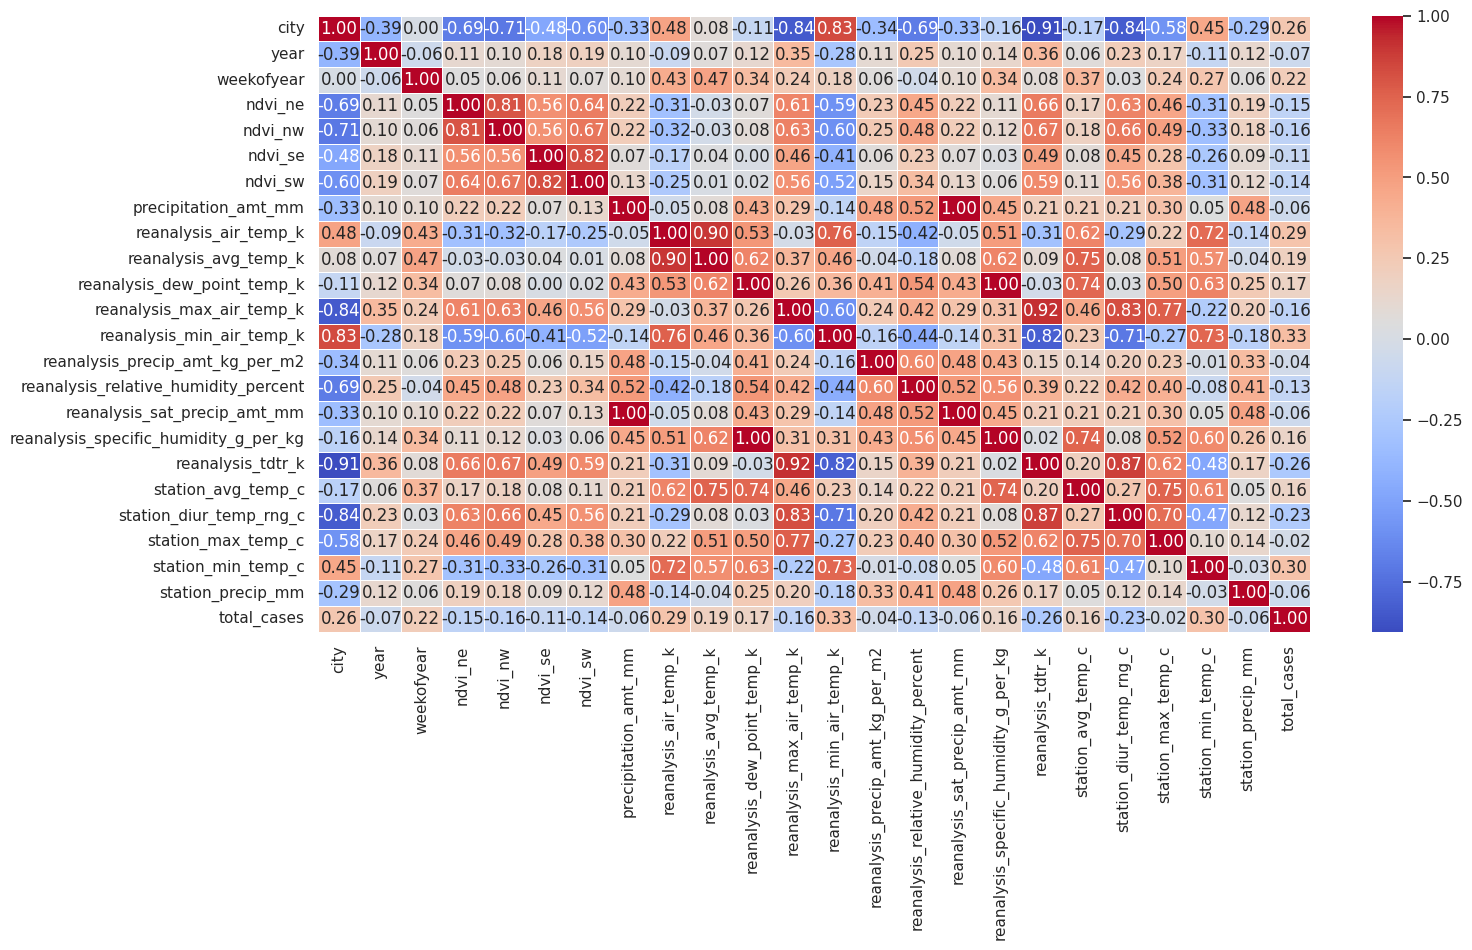

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = data.corr()
sns.set(style='white')
plt.figure(figsize=(16,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

 Este no será el método que usaré para la selección de características pero sí podemos hacernos una idea de las mejores características que podríamos usar, es decir que tengan una buena conexión. En primer lugar, podemos observar que hay varias características las cuales tienen una buena conexión con varias por ejemplo ndvi_ne la cual posee 7 una buena conexión con 7 características. Esto se puede comparar a la poca conexión que tiene city con la mayoría de características siendo solo reanalysis_min_air_temp_k la única que se lleva muy bien con city el resto no pasa del 50% siendo todas inferiores a este porcentaje. Esto sería la forma de ir viendo cuales son mejores junto a otras. Otro ejemplo podría ser el mismo reanalysis_min_air_temp_k el cual se lleva bien con muchas otras características por lo que podría ser una buena opción. Lo bueno es que no debes ser muy atento al detalle para poder ver cuáles son las mejores características ya que gracias a la escala de colores se puede ver perfectamente y de un solo vistazo cuales son las características que tendrían una mejor baza para poder ser parte del entrenamiento

# **Kbest**

Ahora vamos a usar un método no grafico para seleccionar características y esto se puede usar fácilmente con kbest. Lo que he hecho ha sido usar 2 modelos de regresión para ver quien me daba mejores resultados. Para ello y no tener que ir poniendo la cantidad de características de una a una y ver el resultado, he creado un pequeño for el cual recorre el rango de las características para ver qué cantidad de características me da un mejor mse. Básicamente lo que hace mi for es recorrer ese rango e ir entrenado un modelo de regresión con la cantidad de características que le toca en ese bucle dándome como salida la cantidad de características usadas, sus nombres y su mse.

In [194]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Dividimos los datos
X = data.drop(["total_cases"],axis=1)
y = data["total_cases"]
modelo = RandomForestRegressor()
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,24):
  k_best = SelectKBest(score_func=f_regression, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El error cuadrático medio es de: {mse}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['reanalysis_min_air_temp_k', 'station_min_temp_c'], dtype='object')
El error cuadrático medio es de: 3249.4856558053834

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 3402.282879362085

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['city', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 3372.1708091208284

CANTIDAD DE CARACTERÍSTICAS: 5
Las características seleccionadas para 5 son: Index(['city', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_tdtr_k', 'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 2928.335279961831

CANTIDAD DE CARACTERÍSTICAS: 6

Este vino a ser el mejor resultado que obtuvimos usando kbest, nos dice que con estas 12 características nos da un error cuadrático medio de 2747.954 pero también usaré el de 19 características que llega a 690.724 de mse. Por lo que apriori es un muy buen resultado, por lo que vamos a crear un nuevo dataset para todas estas características. 'city', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_sw',
       'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']

Hay otros conjuntos de características las cuales son algo mejores, pero por ahora usaré estas debido a que los otros conjutos son mayores a 12 y más adelante compararé si en verdad es mejor o no. El modelo por el que me he decantado es el de RandomForestRegressor debido a que simplemente me ha dado mejores resultados, igualmente añadiré un ejemplo usando el de DecisionTreeRegressor.

Hay otros conjuntos de características las cuales son algo mejores, pero por ahora usaré estas debido a que los otros conjutos son mayores a 12 y más adelante compararé si en verdad es mejor o no. El modelo por el que me he decantado es el de RandomForestRegressor debido a que simplemente me ha dado mejores resultados, igualmente añadiré un ejemplo usando el de DecisionTreeRegressor.

No tengo pensado usar el KNN, pero me parece interesante probar todos los métodos que pueda para ver como se mueve el dataset entre diferentes entornos. En este caso podemos ver que entre 15 y 34 vecinos nos dan un MSE por debajo de 2.200. Como veremos otros métodos nos dan un mejor resultado, pero como ya dije comprobar otros métodos siempre será una buena forma de ver nuevas cosas.

In [236]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
mse = mean_squared_error

for knn in range(2,50):
  knn = KNeighborsRegressor(knn, weights="uniform")
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mse_Actual =mse(y_pred, y_test)
  print (f'MSE con {knn} vecinos, %2f' %(mse_Actual))

MSE con KNeighborsRegressor(n_neighbors=2) vecinos, 2931.452000
MSE con KNeighborsRegressor(n_neighbors=3) vecinos, 2707.231704
MSE con KNeighborsRegressor(n_neighbors=4) vecinos, 2583.112333
MSE con KNeighborsRegressor() vecinos, 2560.656107
MSE con KNeighborsRegressor(n_neighbors=6) vecinos, 2520.079481
MSE con KNeighborsRegressor(n_neighbors=7) vecinos, 2545.776163
MSE con KNeighborsRegressor(n_neighbors=8) vecinos, 2475.646917
MSE con KNeighborsRegressor(n_neighbors=9) vecinos, 2480.754733
MSE con KNeighborsRegressor(n_neighbors=10) vecinos, 2494.319040
MSE con KNeighborsRegressor(n_neighbors=11) vecinos, 2471.756937
MSE con KNeighborsRegressor(n_neighbors=12) vecinos, 2382.600519
MSE con KNeighborsRegressor(n_neighbors=13) vecinos, 2292.749333
MSE con KNeighborsRegressor(n_neighbors=14) vecinos, 2251.957578
MSE con KNeighborsRegressor(n_neighbors=15) vecinos, 2162.038021
MSE con KNeighborsRegressor(n_neighbors=16) vecinos, 2154.456021
MSE con KNeighborsRegressor(n_neighbors=17) ve

**Usando DecisionTreeRegressor**

Elegí este primero modelo simplemente porque es uno de los más usados para este tipo de tareas y su vez el suele dar buenos resultados al final de un entrenamiento.

In [195]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Dividimos los datos
X = data.drop(["total_cases"],axis=1)
y = data["total_cases"]
modelo = DecisionTreeRegressor()
#Vemos los resultados que nos da con diferentes cantidades de características.

for n in range(2,24):
  k_best = SelectKBest(score_func=f_regression, k=n)
  X_best = k_best.fit_transform(X,y)
  select_column = X.columns[k_best.get_support()]
  X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
  modelo.fit(X_train,y_train)
  y_pred = modelo.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(f"\nCANTIDAD DE CARACTERÍSTICAS: {n}")
  print(f"Las características seleccionadas para {n} son: {select_column}")
  print(f"El error cuadrático medio es de: {mse}")


CANTIDAD DE CARACTERÍSTICAS: 2
Las características seleccionadas para 2 son: Index(['reanalysis_min_air_temp_k', 'station_min_temp_c'], dtype='object')
El error cuadrático medio es de: 3364.6828153195106

CANTIDAD DE CARACTERÍSTICAS: 3
Las características seleccionadas para 3 son: Index(['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 5073.332166666667

CANTIDAD DE CARACTERÍSTICAS: 4
Las características seleccionadas para 4 son: Index(['city', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 4969.128260740741

CANTIDAD DE CARACTERÍSTICAS: 5
Las características seleccionadas para 5 son: Index(['city', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_tdtr_k', 'station_min_temp_c'],
      dtype='object')
El error cuadrático medio es de: 4552.880260740741

CANTIDAD DE CARACTERÍSTICAS: 6


Probando unas 2 veces para ver qué resultados me daba, podemos ver que da un mayor mse que lo visto con el otro modelo, no es súper malo pero en mis pruebas ha tenido un peor rendimiento que el de RandomForestRegressor.

In [196]:
#Creamos el nuevo dataset.
k_best = SelectKBest(score_func=f_regression, k=12)
X_best = k_best.fit_transform(X,y)
select_column = X.columns[k_best.get_support()]
X_best = pd.DataFrame(X_best, columns=select_column)
X_best

,city,weekofyear,ndvi_nw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_min_temp_c
0,1.0,18.0,0.395620,0.515135,0.433531,0.554582,0.202454,0.744526,0.120740,0.545593,0.256379,0.600
1,1.0,19.0,0.401502,0.512892,0.434378,0.539659,0.184049,0.766423,0.082765,0.496960,0.128797,0.640
2,1.0,20.0,0.530100,0.641069,0.529213,0.643309,0.269939,0.744526,0.209348,0.694529,0.318348,0.688
3,1.0,21.0,0.394746,0.671712,0.573243,0.540470,0.319018,0.781022,0.203505,0.708207,0.189550,0.816
4,1.0,22.0,0.448768,0.683483,0.566469,0.581022,0.276074,0.810219,0.148978,0.661094,0.258809,0.728
...,...,...,...,...,...,...,...,...,...,...,...,...
1867,0.0,21.0,0.701294,0.625187,0.696867,0.815572,0.730061,0.605839,0.575463,0.769504,0.671122,0.656
1868,0.0,22.0,0.557842,0.493834,0.533446,0.773236,0.656442,0.416058,0.416748,0.641844,0.549210,0.600
1869,0.0,23.0,0.544889,0.267377,0.320068,0.665207,0.472393,0.452555,0.418695,0.319149,0.243013,0.400
1870,0.0,24.0,0.635120,0.234305,0.311600,0.645093,0.509202,0.416058,0.444012,0.429078,0.398947,0.544


Ahora creamos un nuevo dataset con las mejores 12 características. Como podemos ver tiene la misma cantidad de filas pero lo único verdaderamente diferente es el hecho que hay menos columnas.

# División de los datos

In [197]:
#Dividimos los datos en entranmiento y prueb
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.20, random_state=100)
#Dividimos nuevamente pero ahora en entramiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=42 )
#Modelo elegido
modelo = RandomForestRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"El error cuadrático medio es de {round((mse),2)}")

El error cuadrático medio es de 2072.99


Aquí lo que hacemos es dividir los datos en train, test y validation. Para poder entrenar el modelo de randomforestregressor de buena forma.

# Entrenamiento modelo 1º de árboles

In [198]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [199]:
# Define el diccionario de parámetros para GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Usando gridseachcv

In [202]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Define los modelos y sus nombres
names = ["DecisionTreeRegressor", "RandomForestRegressor"]
classifiers = [DecisionTreeRegressor(), RandomForestRegressor()]
# Aplicamos el cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)
total_scores = []
count=1
for name, classifier in zip(names, classifiers):
    fold_accuracy = []
    for train_fold, test_fold in kfold.split(X_train):
        # Dividimos los datos
        kf_train_X = X_train.iloc[train_fold]
        kf_train_y = y_train.iloc[train_fold]
        # Creamos el GridSearchCV para el clasificador actual
        grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(kf_train_X, kf_train_y)
        print(f"Mejor estimador para y con el fold {count}  {name}: {grid_search.best_estimator_}")
        count+=1
        # Realizamos la predicción
        y_pred = grid_search.best_estimator_.predict(X_train.iloc[test_fold])
        # Calculamos el MSE
        mse = mean_squared_error(y_train.iloc[test_fold], y_pred)
        fold_accuracy.append(mse)
    total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

for n in range(len(names)):
    print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

Mejor estimador para y con el fold 1  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Mejor estimador para y con el fold 2  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Mejor estimador para y con el fold 3  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)
Mejor estimador para y con el fold 4  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Mejor estimador para y con el fold 5  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Mejor estimador para y con el fold 6  RandomForestRegressor: RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)
Mejor estimador para y con el fold 7  RandomForestRegressor: RandomForestRegressor(max_depth=30, min_samples_leaf=2)
Mejor estimador para y con el fold 8  RandomForestR

He usado el cross validation para ambos modelos, usando grid en este caso. Me ha dado los resultados que se pueden ver ahí, no pude conseguir que me diera solo el mejor conjuto de híperparámetros por lo que tuve que mostrar los mejores por cada pliegue. Ya eso sí el mse si que pude trabajarlo como he hecho con el accuracy en otras ocaciones

Usando randomsearchcv

In [203]:
# Aplicamos el cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)
total_scores = []
count=1
for name, classifier in zip(names, classifiers):
    fold_accuracy = []
    for train_fold, test_fold in kfold.split(X_train):
        # Dividimos los datos
        kf_train_X = X_train.iloc[train_fold]
        kf_train_y = y_train.iloc[train_fold]
        # Creamos el RandomizedSearchCV para el clasificador actual
        random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=50, random_state=42, n_jobs=-1)
        # Entrenamos el modelo con GridSearchCV
        random_search.fit(kf_train_X, kf_train_y)
        print(f"Mejor estimador con el fold {count}  {name}: {random_search.best_estimator_}")
        count+=1
        # Realizamos la predicción
        y_pred = random_search.best_estimator_.predict(X_train.iloc[test_fold])
        # Calculamos el MSE
        mse = mean_squared_error(y_train.iloc[test_fold], y_pred)
        fold_accuracy.append(mse)
    total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

for n in range(len(names)):
    print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 1  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 2  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 3  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 4  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 5  DecisionTreeRegressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 6  RandomForestRegressor: RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 7  RandomForestRegressor: RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 8  RandomForestRegressor: RandomForestRegressor(max_depth=10, min_samples_leaf=2)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 9  RandomForestRegressor: RandomForestRegressor(min_samples_split=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 10  RandomForestRegressor: RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10)
Modelo: DecisionTreeRegressor = 2490.29
Modelo: RandomForestRegressor = 1720.63


Tras casi 5 m trabajando el cross validation nos ha dado este resultado de las medias de los mse que ha usado, en este caso solo hemos usado gridsearch y podemos ver los 2 modelos

# Otra forma de hacer lo anterior poco a poco

In [204]:
# Define el diccionario de parámetros para GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [230]:
from scipy.stats import randint
param_distributions = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

# **Usando Randomforestregressor**

In [205]:
#Búsqueda de hiperparámetros
modelo = RandomForestRegressor()
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [206]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print(f"""
      Grid:
      Mejor conjunto de parámetros: {best_params_grid}
      Mejor score: {best_score_grid}
      """)


      Grid:
      Mejor conjunto de parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
      Mejor score: -1573.08981938212
      


In [207]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_grid = grid_search.best_estimator_
best_model_grid.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [208]:
#Buscamos los hiperparámetros
modelo = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_distributions, cv=5, scoring='neg_mean_squared_error', n_iter=50, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f510f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f51c30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f39210>},
                   random_state=42, scoring='neg_mean_squared_error')

In [209]:
#Obtener los mejores hiperámetros y el mejor porcentaje de validación
mejores_parámetros = random_search.best_params_
mejores_porcentajes = random_search.best_score_

In [210]:
print(f"""
      Random:
      Mejor conjunto de parámetros: {mejores_parámetros}
      Mejor score: {mejores_porcentajes}
      """)


      Random:
      Mejor conjunto de parámetros: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 10}
      Mejor score: -1590.3943387196305
      


In [211]:
#Ya con los anteriores entrenamos el modelo, con los mejores hiperparámetros
modelo_random = random_search.best_estimator_
modelo_random.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=6, min_samples_split=10)

In [212]:
from sklearn.metrics import mean_squared_error

# Calcula las predicciones para ambos modelos
y_pred_grid = best_model_grid.predict(X_test)
y_pred_random = modelo_random.predict(X_test)

# Calcula el MSE para el modelo de Grid
mse_grid = mean_squared_error(y_test, y_pred_grid)

# Calcula el MSE para el modelo Random
mse_random = mean_squared_error(y_test, y_pred_random)

print("El modelo utilizado es: Randomforestregressor")
print(f"MSE para el buscador de Grid: {round((mse_grid),2)}")
print(f"MSE para el buscador Random: {round((mse_random),2)}")

El modelo utilizado es: Randomforestregressor
MSE para el buscador de Grid: 2084.53
MSE para el buscador Random: 2032.86


Esta forma de hacerlo me ha dado un poco de mejoría en los resultados. Diría que de esta forma son más estables. Además, como se puede observar los resultados de este método son parecidos a los vistos en el cross_validation.

# **Usando DecisionTreeRegressor**

In [213]:
#Cargamos el modelo DescisionTreeRegressor. Como en el anterior apartado usaré el mse para ver que tan bien predice el modelo.
modelo = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_distributions, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f510f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f51c30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788be8f39210>},
                   scoring='neg_mean_squared_error')

In [214]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_random = random_search.best_params_
best_score_radom = random_search.best_score_
print(f"""
      Randomsearch:
      Mejor conjunto de parámetros: {best_params_random}
      Mejor score: {best_score_radom}
      """)


      Randomsearch:
      Mejor conjunto de parámetros: {'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 18}
      Mejor score: -2013.7687876853965
      


In [215]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_random = random_search.best_estimator_
best_model_random.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=8, min_samples_split=18)

In [216]:
#Usando grid_search
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [217]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print(f"""
      Randomsearch:
      Mejor conjunto de parámetros: {best_params_grid}
      Mejor score: {best_score_grid}
      """)


      Randomsearch:
      Mejor conjunto de parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
      Mejor score: -2660.989355145931
      


In [218]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_grid = grid_search.best_estimator_
best_model_grid.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [219]:
from sklearn.metrics import mean_squared_error

# Calcula las predicciones para ambos modelos
y_pred_grid = best_model_grid.predict(X_test)
y_pred_random = modelo_random.predict(X_test)

# Calcula el MSE para el modelo de Grid
mse_grid = mean_squared_error(y_test, y_pred_grid)

# Calcula el MSE para el modelo Random
mse_random = mean_squared_error(y_test, y_pred_random)

print("El modelo utilizado es: DecisionTreeRegressor")
print(f"MSE para el buscador de Grid: {round((mse_grid),2)}")
print(f"MSE para el buscador Random: {round((mse_random),2)}")

El modelo utilizado es: DecisionTreeRegressor
MSE para el buscador de Grid: 2738.85
MSE para el buscador Random: 2032.86


# **Usando linearRegression**

Estos parámetros son más sencilllos, al no ser un modelo de árboles no podemos añadir todos los parámetros que vimos antes.


In [220]:
param_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

Ahora vamos a hacer por última vez todo lo anterior, es decir, la búsqueda de híperparámetros. En este casi usaré el modelo linearRegression para hacer las pruebas, ya luego haré pruebas de ver cual modelo da mejores resultados, si hay alguno que se destaqué más que los otros.

In [221]:
#Usando grid_search
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
grid_search = GridSearchCV(estimator=modelo, param_grid=param_linear, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [222]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print(f"""
      Randomsearch:
      Mejor conjunto de parámetros: {best_params_grid}
      Mejor score: {best_score_grid}
      """)


      Randomsearch:
      Mejor conjunto de parámetros: {'fit_intercept': True, 'positive': False}
      Mejor score: -2003.529228672513
      


In [223]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_grid = grid_search.best_estimator_
best_model_grid.fit(X_train, y_train)

LinearRegression()

In [224]:
#Usamos randomsearch
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_linear, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   scoring='neg_mean_squared_error')

In [225]:
#Obtenemos los mejores parámetros y los mejores scores
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
print(f"""
      Randomsearch:
      Mejor conjunto de parámetros: {best_params_grid}
      Mejor score: {best_score_grid}
      """)


      Randomsearch:
      Mejor conjunto de parámetros: {'fit_intercept': True, 'positive': False}
      Mejor score: -2003.529228672513
      


In [226]:
#Entrenamos un modelo con los mejores hiperparámetros
best_model_random = random_search.best_estimator_
best_model_random.fit(X_train, y_train)

LinearRegression()

In [227]:
from sklearn.metrics import mean_squared_error

# Calcula las predicciones para ambos modelos
y_pred_grid = best_model_grid.predict(X_test)
y_pred_random = modelo_random.predict(X_test)

# Calcula el MSE para el modelo de Grid
mse_grid = mean_squared_error(y_test, y_pred_grid)

# Calcula el MSE para el modelo Random
mse_random = mean_squared_error(y_test, y_pred_random)

print("E modelo utilizado fue LinearRegression:")
print(f"MSE para el buscador de Grid: {round((mse_grid),2)}")
print(f"MSE para el buscador Random: {round((mse_random),2)}")

E modelo utilizado fue LinearRegression:
MSE para el buscador de Grid: 2501.43
MSE para el buscador Random: 2032.86


Hago un cross validation con 2 modelos de regresión para probar su funcionamiento. Buscando algún modelo extra que use, vi uno llamado Ridge, que muy parecido a linearRegression pero con la diferencia que añade una penalización L2 para evitar el overfitting.

In [228]:
# Aplicamos el cross validation Usando Gridsearch
from sklearn.linear_model import Ridge
kfold = KFold(n_splits=5, shuffle=True, random_state=100)
total_scores = []
count=1
names = ["LinearRegression", "Ridge"]
classifiers = [LinearRegression(), Ridge()]
for name, classifier in zip(names, classifiers):
    fold_accuracy = []
    for train_fold, test_fold in kfold.split(X_train):
        # Dividimos los datos
        kf_train_X = X_train.iloc[train_fold]
        kf_train_y = y_train.iloc[train_fold]
        # Creamos el RandomizedSearchCV para el clasificador actual
        random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_linear, cv=5, scoring='neg_mean_squared_error', n_iter=50, random_state=42, n_jobs=-1)
        # Entrenamos el modelo con RandomizedSearchCV
        random_search.fit(kf_train_X, kf_train_y)
        print(f"Mejor estimador con el fold {count}  {name}: {random_search.best_estimator_}")
        count+=1
        # Realizamos la predicción
        y_pred = random_search.best_estimator_.predict(X_train.iloc[test_fold])
        # Calculamos el MSE
        mse = mean_squared_error(y_train.iloc[test_fold], y_pred)
        fold_accuracy.append(mse)
    total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

for n in range(len(names)):
    print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

Mejor estimador con el fold 1  LinearRegression: LinearRegression(fit_intercept=False)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 2  LinearRegression: LinearRegression()
Mejor estimador con el fold 3  LinearRegression: LinearRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 4  LinearRegression: LinearRegression()
Mejor estimador con el fold 5  LinearRegression: LinearRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 6  Ridge: Ridge()
Mejor estimador con el fold 7  Ridge: Ridge()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 8  Ridge: Ridge()
Mejor estimador con el fold 9  Ridge: Ridge()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor estimador con el fold 10  Ridge: Ridge()
Modelo: LinearRegression = 2018.08
Modelo: Ridge = 2013.32


Usamos el mismo código pero esta vez con el grid

In [229]:
# Aplicamos el cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)
total_scores = []
count=1
for name, classifier in zip(names, classifiers):
    fold_accuracy = []
    for train_fold, test_fold in kfold.split(X_train):
        # Dividimos los datos
        kf_train_X = X_train.iloc[train_fold]
        kf_train_y = y_train.iloc[train_fold]
        # Creamos el GridSearchCV para el clasificador actual
        grid_search = GridSearchCV(estimator=classifier, param_grid=param_linear, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(kf_train_X, kf_train_y)
        print(f"Mejor estimador para y con el fold {count}  {name}: {grid_search.best_estimator_}")
        count+=1
        # Realizamos la predicción
        y_pred = grid_search.best_estimator_.predict(X_train.iloc[test_fold])
        # Calculamos el MSE
        mse = mean_squared_error(y_train.iloc[test_fold], y_pred)
        fold_accuracy.append(mse)
    total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

for n in range(len(names)):
    print(f"Modelo: {names[n]} = {round((total_scores[n]),2)}")

Mejor estimador para y con el fold 1  LinearRegression: LinearRegression(fit_intercept=False)
Mejor estimador para y con el fold 2  LinearRegression: LinearRegression()
Mejor estimador para y con el fold 3  LinearRegression: LinearRegression()
Mejor estimador para y con el fold 4  LinearRegression: LinearRegression()
Mejor estimador para y con el fold 5  LinearRegression: LinearRegression()
Mejor estimador para y con el fold 6  Ridge: Ridge()
Mejor estimador para y con el fold 7  Ridge: Ridge()
Mejor estimador para y con el fold 8  Ridge: Ridge()
Mejor estimador para y con el fold 9  Ridge: Ridge()
Mejor estimador para y con el fold 10  Ridge: Ridge()
Modelo: LinearRegression = 2018.08
Modelo: Ridge = 2013.32
